In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("house_rental_data.csv (5).txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [9]:
df.shape

(645, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [11]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


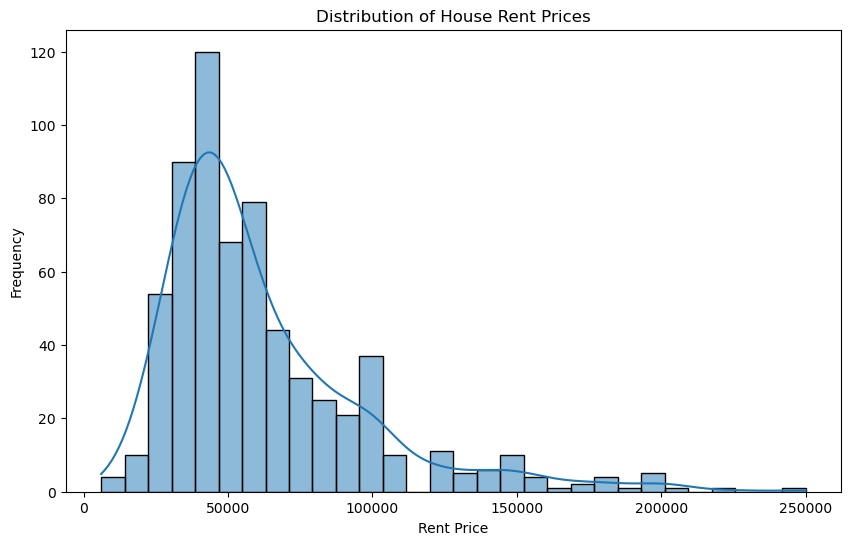

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of House Rent Prices")
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

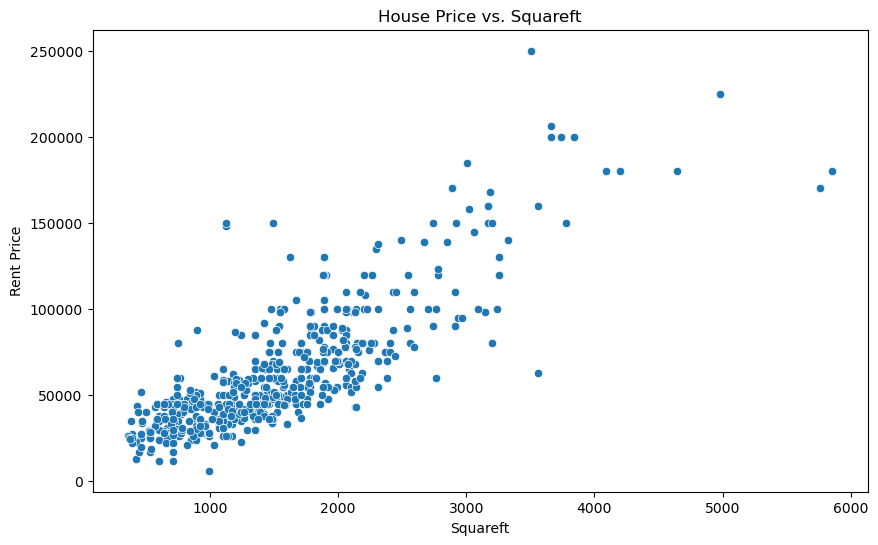

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sqft', y='Price', data=df)
plt.title('House Price vs. Squareft')
plt.xlabel('Squareft')
plt.ylabel('Rent Price')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = df[['Sqft','TotalFloor','Bedroom','Living.Room','Bathroom']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train

,Sqft,TotalFloor,Bedroom,Living.Room,Bathroom
515,1487.244,7,3,1,2
29,853.920,7,2,1,1
274,1138.560,5,3,2,2
576,693.810,7,1,1,1
434,2910.444,7,3,2,3
...,...,...,...,...,...
71,1284.438,12,3,2,2
106,3202.200,12,5,3,3
270,1366.272,11,4,2,2
435,3010.068,11,3,2,2


In [22]:
y_train

515     36000
29      24028
274     26000
576     33000
434     90000
        ...  
71      41000
106     80000
270     49999
435    185000
102     95000
Name: Price, Length: 516, dtype: int64

In [23]:
X_test

,Sqft,TotalFloor,Bedroom,Living.Room,Bathroom
632,1099.422,7,4,2,2
592,1102.980,4,2,2,2
599,1458.780,27,3,2,2
291,761.412,13,1,1,1
72,1892.856,7,4,2,3
...,...,...,...,...,...
513,843.246,18,1,1,1
631,996.240,5,3,1,1
215,1743.420,12,3,2,2
608,711.600,12,1,2,1


In [24]:
y_test

632    57777
592    31000
599    60000
291    26000
72     90000
       ...  
513    51500
631    28000
215    45000
608    30000
135    48000
Name: Price, Length: 129, dtype: int64

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [31]:
k_values = np.arange(1, 21)
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred))

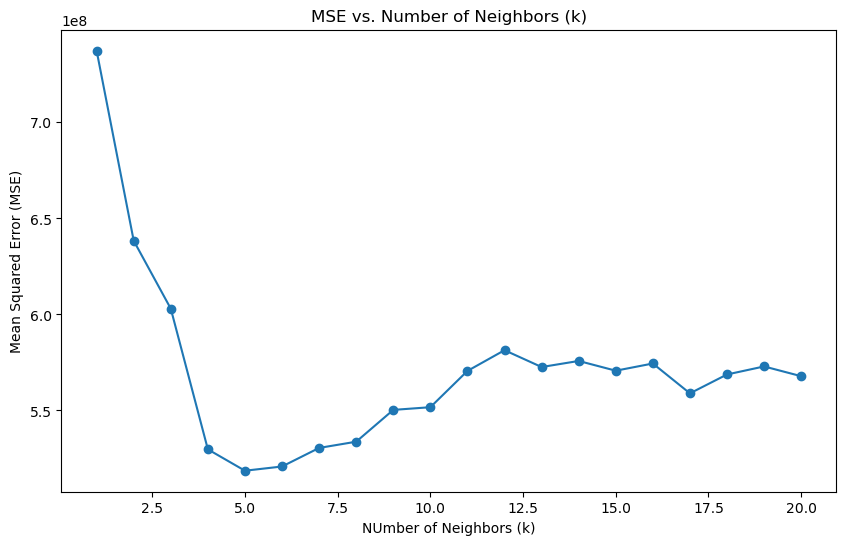

The best value of k is: 5


In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs. Number of Neighbors (k)')
plt.xlabel('NUmber of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

best_k = k_values[np.argmin(mse_values)]
print(f'The best value of k is: {best_k}')